# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nabila Kumala Gantari
- **Email:** nab1lakumala@gmail.com / m004d4kx1570@bangkit.academy
- **ID Dicoding:** nkumala16

## Menentukan Pertanyaan Bisnis

- Kapan user melakukan transaksi peminjaman sepeda pada masing-masing kategori hari libur dan hari kerja?
  1.   Pada hari apakah masing-masing tanggal tersebut?
  2.    Untuk hari libur, apakah tanggal tersebut merupakan suatu hari perayaan? Jika iya, perayaan apakah itu?

- Bagaimana perkembangan jumlah peminjam sepeda di setiap bulannya? Apakah terdapat bulan tertentu dimana terjadi lonjakan jumlah tersebut?

- Apakah kondisi di setiap musim yang paling mempengaruhi jumlah peminjam sepeda?

## Import Semua Packages/Library yang Digunakan

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [39]:
# Memuat tabel pada hour.csv dari Bike Sharing Dataset

bikeshare_df = pd.read_csv("https://raw.githubusercontent.com/NabilaKumala/DataAnalysisProject/main/Bike%20Sharing%20Dataset/day.csv")
bikeshare_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Keterangan kolom dataset

1.   instant: record index
2.   dteday : date
3.   season : season (1:spring, 2:summer, 3:fall, 4:winter)
4.   yr : year (0: 2011, 1:2012)
5.   mnth : month (1 to 12)
6.   hr : hour (0 to 23)
7.   holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
8.   weekday : day of the week (0:sun, 1:mon, 2:tue, 3:wed, 4:thu, 5:fri, 6:sat)
9.   workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
10.   weathersit :
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
11.  temp : Normalized temperature in Celsius. The values are divided to 41 (max)
12.  atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
13.  hum: Normalized humidity. The values are divided to 100 (max)
14.  windspeed: Normalized wind speed. The values are divided to 67 (max)
15.  casual: count of casual users
16.  registered: count of registered users
17.  cnt: count of total rental bikes including both casual and registered

### Assessing Data

In [40]:
# Memeriksa tipe data pada tiap kolom tabel

bikeshare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [41]:
# Memeriksa keberadaan missing value

bikeshare_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Diketahui bahwa tidak ada missing value pada data tersebut.

In [42]:
# Melakukan pengecekan terhadap baris duplikat

print("Jumlah baris duplikat: ", bikeshare_df.duplicated().sum())

Jumlah baris duplikat:  0


In [43]:
# Ringkasan parameter statistik dataset

bikeshare_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

In [44]:
# Mengubah tipe data object menjadi datetime untuk kolom dteday

bikeshare_df["dteday"] = pd.to_datetime(bikeshare_df["dteday"])

bikeshare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [45]:
# Drop kolom instant

bikeshare_df.drop("instant", axis=1, inplace=True)

In [46]:
# Cek kembali dataset setelah drop kolom instant

bikeshare_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Exploratory Data Analysis (EDA)

### Explore Bike Sharing Dataset

In [47]:
# Ringkasan parameter statistik dataset

bikeshare_df.describe(include="all")

<ipython-input-47-d25590ce8967>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  bikeshare_df.describe(include="all")


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [48]:
# Mengurutkan dataset berdasarkan hari dengan jumlah transaksi peminjaman terbanyak

bikeshare_df.sort_values(by="cnt", ascending=False)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
623,2012-09-15,3,1,9,0,6,0,1,0.608333,0.585867,0.501667,0.247521,3160,5554,8714
637,2012-09-29,4,1,9,0,6,0,1,0.542500,0.530296,0.542917,0.227604,2589,5966,8555
630,2012-09-22,3,1,9,0,6,0,1,0.650000,0.610488,0.646667,0.283583,2512,5883,8395
447,2012-03-23,2,1,3,0,5,1,2,0.601667,0.570067,0.694167,0.116300,2469,5893,8362
504,2012-05-19,2,1,5,0,6,0,1,0.600000,0.566908,0.456250,0.083975,3410,4884,8294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,2011-03-06,1,0,3,0,0,0,2,0.376522,0.366252,0.948261,0.343287,114,491,605
25,2011-01-26,1,0,1,0,3,1,3,0.217500,0.203600,0.862500,0.293850,34,472,506
725,2012-12-26,1,1,12,0,3,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441
26,2011-01-27,1,0,1,0,4,1,1,0.195000,0.219700,0.687500,0.113837,15,416,431


Diketahui bahwa jumlah transaksi peminjaman sepeda terbanyak dilakukan pada Hari Sbtu dan bukan merupakan hari libur (holiday). Hal serupa terjadi pada jumlah paling sedikit, yaitu kebanyakan bukan merupakan peminjaman di hari libur.

In [49]:
# Menghitung jumlah keseluruhan transaksi peminjaman sepeda

total_cnt = bikeshare_df["cnt"].sum()

print("Jumlah keseluruhan transaksi peminjaman sepeda:", total_cnt)

Jumlah keseluruhan transaksi peminjaman sepeda: 3292679


In [50]:
# Jumlah transaksi peminjaman sepeda di setiap musim, berdasarkan tipe user dan total keseluruhannya

bikeshare_df.groupby(by=["season"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,casual,registered,cnt
season,,,
3,226091,835038,1061129
2,203522,715067,918589
4,129782,711831,841613
1,60622,410726,471348


In [51]:
# Jumlah keseluruhan transaksi peminjaman sepeda dan informasi mengenai rata-rata cuaca di setiap musim

bs_season_df = bikeshare_df.groupby(by="season").agg({
    "cnt": "sum",
    "weathersit": "mean",
    "temp": "mean",
    "atemp": "mean",
    "hum": "mean",
    "windspeed": "mean"
}).sort_values(by="cnt", ascending=False)

bs_season_df

,cnt,weathersit,temp,atemp,hum,windspeed
season,,,,,,
3,1061129,1.297872,0.706309,0.655898,0.633482,0.172095
2,918589,1.402174,0.544405,0.520307,0.626948,0.203507
4,841613,1.477528,0.422906,0.415539,0.668719,0.171995
1,471348,1.408840,0.297748,0.296914,0.582903,0.214537


#### Musim Semi (Spring)

In [52]:
# Membuat dataframe untuk data peminjaman sepeda di musim semi dan menampilkannya

bs_spring_df = bikeshare_df[(bikeshare_df['season'] == 1)]

bs_spring_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [53]:
# Ringkasan parameter statistik data peminjaman sepeda di musim semi

bs_spring_df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,181.0,181.000000,181.000000,181.000000,181.00000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,1.0,0.502762,3.093923,0.038674,3.00000,0.662983,1.408840,0.297748,0.296914,0.582903,0.214537,334.928177,2269.204420,2604.132597
std,0.0,0.501379,3.403759,0.193352,2.03306,0.474002,0.536169,0.102735,0.099026,0.151880,0.086439,387.655561,1200.269751,1399.942119
min,1.0,0.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.059130,0.079070,0.000000,0.045408,9.000000,416.000000,431.000000
25%,1.0,0.000000,1.000000,0.000000,1.00000,0.000000,1.000000,0.222500,0.232333,0.483333,0.155091,109.000000,1379.000000,1538.000000
50%,1.0,1.000000,2.000000,0.000000,3.00000,1.000000,1.000000,0.285833,0.282821,0.544167,0.202750,218.000000,1867.000000,2209.000000
75%,1.0,1.000000,3.000000,0.000000,5.00000,1.000000,2.000000,0.361739,0.359670,0.696087,0.253112,424.000000,3162.000000,3456.000000
max,1.0,1.000000,12.000000,1.000000,6.00000,1.000000,3.000000,0.572500,0.548617,0.948261,0.507463,3155.000000,5315.000000,7836.000000


#### Musim Panas (Summer)

In [54]:
# Membuat dataframe untuk data peminjaman sepeda di musim panas dan menampilkannya

bs_summer_df = bikeshare_df[(bikeshare_df['season'] == 2)]

bs_summer_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
79,2011-03-21,2,0,3,0,1,1,2,0.430435,0.409735,0.737391,0.288783,401,1676,2077
80,2011-03-22,2,0,3,0,2,1,1,0.441667,0.440642,0.624583,0.225750,460,2243,2703
81,2011-03-23,2,0,3,0,3,1,2,0.346957,0.337939,0.839565,0.234261,203,1918,2121
82,2011-03-24,2,0,3,0,4,1,2,0.285000,0.270833,0.805833,0.243787,166,1699,1865
83,2011-03-25,2,0,3,0,5,1,1,0.264167,0.256312,0.495000,0.230725,300,1910,2210


In [55]:
# Ringkasan parameter statistik data peminjaman sepeda di musim panas

bs_summer_df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,184.0,184.000000,184.000000,184.000000,184.00000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,2.0,0.500000,4.652174,0.021739,2.98913,0.695652,1.402174,0.544405,0.520307,0.626948,0.203507,1106.097826,3886.233696,4992.331522
std,0.0,0.501364,0.951671,0.146228,1.99997,0.461386,0.523957,0.122650,0.108022,0.152841,0.071629,737.590829,1353.375628,1695.977235
min,2.0,0.000000,3.000000,0.000000,0.00000,0.000000,1.000000,0.253043,0.250339,0.254167,0.065929,120.000000,674.000000,795.000000
25%,2.0,0.000000,4.000000,0.000000,1.00000,0.000000,1.000000,0.458125,0.449642,0.500938,0.147236,650.250000,3012.500000,4003.000000
50%,2.0,0.500000,5.000000,0.000000,3.00000,1.000000,1.000000,0.562083,0.538212,0.644375,0.194031,867.000000,3844.000000,4941.500000
75%,2.0,1.000000,5.000000,0.000000,5.00000,1.000000,2.000000,0.631667,0.594867,0.741667,0.249377,1463.250000,4927.750000,6377.000000
max,2.0,1.000000,6.000000,1.000000,6.00000,1.000000,3.000000,0.808333,0.757579,0.922500,0.388067,3410.000000,6456.000000,8362.000000


#### Musim Gugur (Fall)

In [56]:
# Membuat dataframe untuk data peminjaman sepeda di musim gugur dan menampilkannya

bs_fall_df = bikeshare_df[(bikeshare_df['season'] == 3)]

bs_fall_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
171,2011-06-21,3,0,6,0,2,1,2,0.680833,0.637646,0.770417,0.171025,774,4061,4835
172,2011-06-22,3,0,6,0,3,1,1,0.733333,0.693829,0.707500,0.172262,661,3846,4507
173,2011-06-23,3,0,6,0,4,1,2,0.728333,0.693833,0.703333,0.238804,746,4044,4790
174,2011-06-24,3,0,6,0,5,1,1,0.724167,0.656583,0.573333,0.222025,969,4022,4991
175,2011-06-25,3,0,6,0,6,0,1,0.695000,0.643313,0.483333,0.209571,1782,3420,5202


In [57]:
# Ringkasan parameter statistik data peminjaman sepeda di musim gugur

bs_fall_df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,188.0,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,3.0,0.500000,7.691489,0.021277,3.031915,0.696809,1.297872,0.706309,0.655898,0.633482,0.172095,1202.611702,4441.691489,5644.303191
std,0.0,0.501335,0.948137,0.144690,1.994389,0.460865,0.503034,0.070848,0.072056,0.119349,0.059526,595.975032,1304.626949,1459.800381
min,3.0,0.000000,6.000000,0.000000,0.000000,0.000000,1.000000,0.469167,0.242400,0.360000,0.064071,118.000000,889.000000,1115.000000
25%,3.0,0.000000,7.000000,0.000000,1.000000,0.000000,1.000000,0.667083,0.618540,0.550833,0.131066,781.750000,3477.250000,4586.500000
50%,3.0,0.500000,8.000000,0.000000,3.000000,1.000000,1.000000,0.714583,0.656575,0.635000,0.165115,1050.500000,4110.500000,5353.500000
75%,3.0,1.000000,8.000000,0.000000,5.000000,1.000000,2.000000,0.750208,0.698093,0.712604,0.208957,1424.000000,5667.750000,6929.250000
max,3.0,1.000000,9.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.939565,0.375617,3160.000000,6917.000000,8714.000000


#### Musim DIngin (Winter)

In [58]:
# Membuat dataframe untuk data peminjaman sepeda di musim dingin dan menampilkannya

bs_winter_df = bikeshare_df[(bikeshare_df['season'] == 4)]

bs_winter_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
265,2011-09-23,4,0,9,0,5,1,2,0.609167,0.522125,0.972500,0.078367,258,2137,2395
266,2011-09-24,4,0,9,0,6,0,2,0.606667,0.564412,0.862500,0.078383,1776,3647,5423
267,2011-09-25,4,0,9,0,0,0,2,0.634167,0.572637,0.845000,0.050379,1544,3466,5010
268,2011-09-26,4,0,9,0,1,1,2,0.649167,0.589042,0.848333,0.110700,684,3946,4630
269,2011-09-27,4,0,9,0,2,1,2,0.636667,0.574525,0.885417,0.118171,477,3643,4120


In [59]:
# Ringkasan parameter statistik data peminjaman sepeda di musim dingin

bs_winter_df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,178.0,178.00000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,4.0,0.50000,10.696629,0.033708,2.966292,0.679775,1.477528,0.422906,0.415539,0.668719,0.171995,729.112360,3999.050562,4728.162921
std,0.0,0.50141,0.919402,0.180985,2.008172,0.467879,0.603240,0.107834,0.095536,0.131248,0.081565,606.318118,1444.782557,1699.615261
min,4.0,0.00000,9.000000,0.000000,0.000000,0.000000,1.000000,0.220833,0.227913,0.333478,0.022392,2.000000,20.000000,22.000000
25%,4.0,0.00000,10.000000,0.000000,1.000000,0.000000,1.000000,0.331250,0.337900,0.570729,0.106350,318.500000,2974.500000,3615.500000
50%,4.0,0.50000,11.000000,0.000000,3.000000,1.000000,1.000000,0.409166,0.409394,0.661042,0.166986,544.500000,3815.000000,4634.500000
75%,4.0,1.00000,11.000000,0.000000,5.000000,1.000000,2.000000,0.513542,0.503151,0.756875,0.227610,922.000000,5075.500000,5624.500000
max,4.0,1.00000,12.000000,1.000000,6.000000,1.000000,3.000000,0.657500,0.607975,0.972500,0.422275,3031.000000,6946.000000,8555.000000


## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [60]:
# Menampilkan hari libur dengan transaksi peminjaman sepeda mendapati jumlah paling banyak

bs_hol_df = bikeshare_df[(bikeshare_df['holiday'] == 1)].groupby(by="dteday").agg({"cnt": "max", "weekday": "min"}).sort_values(by="cnt", ascending=False)

bs_hol_df.head(1)

,cnt,weekday
dteday,,
2012-07-04,7403,3


In [61]:
# Menampilkan hari kerja dengan transaksi peminjaman sepeda mendapati jumlah paling banyak

bs_work_df = bikeshare_df[(bikeshare_df['workingday'] == 1)].groupby(by="dteday").agg({"cnt": "max", "weekday": "min"}).sort_values(by="cnt", ascending=False)

bs_work_df.head(1)

,cnt,weekday
dteday,,
2012-03-23,8362,5


### Pertanyaan 2:

In [62]:
# Membuat dataframe bulanan untuk dataset

monthly_bs_df = bikeshare_df.resample(rule='M', on='dteday').agg({
    "cnt": "sum"
})
monthly_bs_df.index = monthly_bs_df.index.strftime('%Y-%m')
monthly_bs_df = monthly_bs_df.reset_index()
monthly_bs_df.rename(columns={
    "dteday": "year_month",
    "cnt": "total"
}, inplace=True)
monthly_bs_df.head()

,year_month,total
0,2011-01,38189
1,2011-02,48215
2,2011-03,64045
3,2011-04,94870
4,2011-05,135821


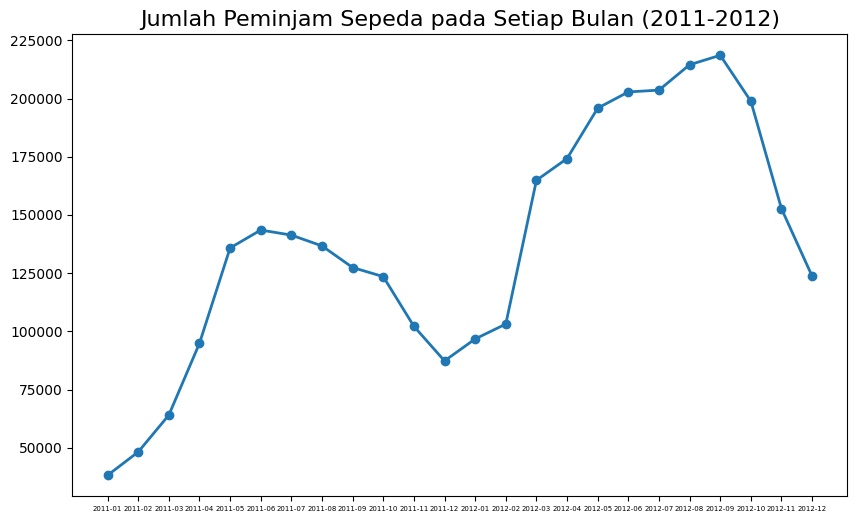

In [63]:
# Menampilkan perkembangan jumlah peminjam sepeda setiap bulannya menggunakan grafik garis

plt.figure(figsize=(10, 6))
plt.plot(monthly_bs_df["year_month"], monthly_bs_df["total"], marker='o', linewidth=2)
plt.title("Jumlah Peminjam Sepeda pada Setiap Bulan (2011-2012)", loc="center", fontsize=16)
plt.xticks(fontsize=5)
plt.yticks(fontsize=10)
plt.show()

Jumlah peminjam sepeda selama dua tahun tersebut selalu mengalami kenaikan selama dua tahun berturut-turut pada pertengahan, lalu turun kembali menuju penghujung suatu tahun.

### Pertanyaan 3:

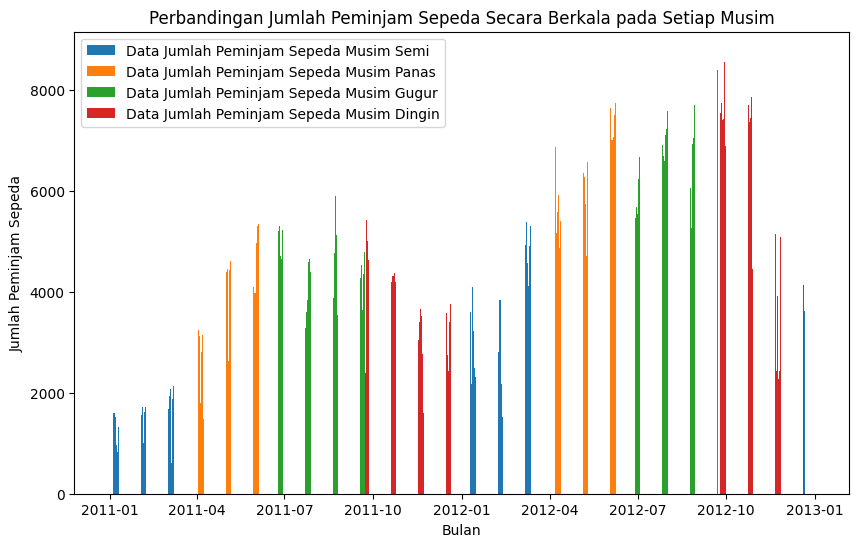

In [64]:
# Plot bar chart
plt.figure(figsize=(10, 6))

# Plot bar chart untuk data musim semi
plt.bar(bs_spring_df['dteday'], bs_spring_df['cnt'], width=0.2, label='Data Jumlah Peminjam Sepeda Musim Semi')

# Plot bar chart untuk data musim panas
plt.bar(bs_summer_df['dteday'], bs_summer_df['cnt'], width=0.2, label='Data Jumlah Peminjam Sepeda Musim Panas', align='edge')

# Plot bar chart untuk data musim gugur
plt.bar(bs_fall_df['dteday'], bs_fall_df['cnt'], width=0.2, label='Data Jumlah Peminjam Sepeda Musim Gugur', align='center')

# Plot bar chart untuk data musim dingin
plt.bar(bs_winter_df['dteday'], bs_winter_df['cnt'], width=0.2, label='Data Jumlah Peminjam Sepeda Musim Dingin', align='edge')

plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjam Sepeda')
plt.title('Perbandingan Jumlah Peminjam Sepeda Secara Berkala pada Setiap Musim')
plt.legend()

plt.show()

Terjadi lonjakan jumlah peminjam sepeda pada penghujung musim panas hingga awal musim dingin.

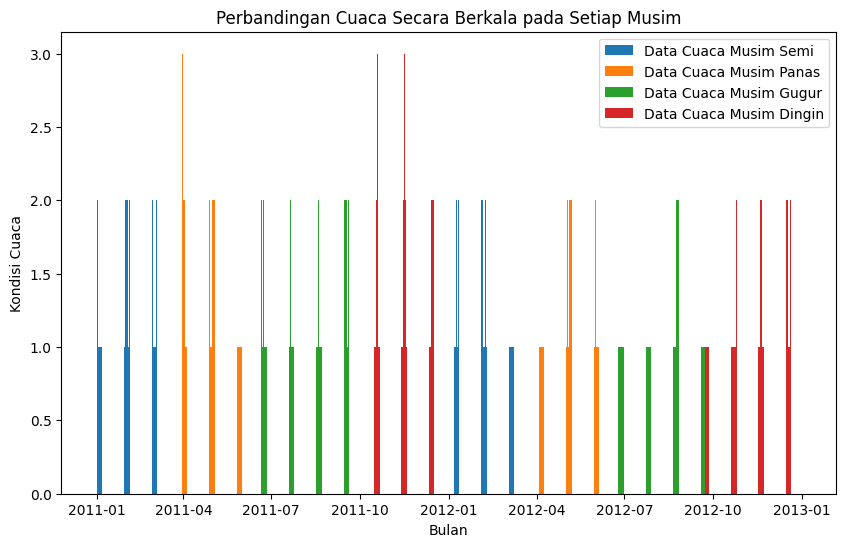

In [65]:
# Plot bar chart
plt.figure(figsize=(10, 6))

# Plot bar chart untuk data musim semi
plt.bar(bs_spring_df['dteday'], bs_spring_df['weathersit'], width=0.2, label='Data Cuaca Musim Semi')

# Plot bar chart untuk data musim panas
plt.bar(bs_summer_df['dteday'], bs_summer_df['weathersit'], width=0.2, label='Data Cuaca Musim Panas', align='edge')

# Plot bar chart untuk data musim gugur
plt.bar(bs_fall_df['dteday'], bs_fall_df['weathersit'], width=0.2, label='Data Cuaca Musim Gugur', align='center')

# Plot bar chart untuk data musim dingin
plt.bar(bs_winter_df['dteday'], bs_winter_df['weathersit'], width=0.2, label='Data Cuaca Musim Dingin', align='edge')

plt.xlabel('Bulan')
plt.ylabel('Kondisi Cuaca')
plt.title('Perbandingan Cuaca Secara Berkala pada Setiap Musim')
plt.legend()

plt.show()

Tdiak terdapat perubahan signifikan antar musim karena terdapat kecenderungan cuaca cerah dan terkadang berawan atau berkabut. Pada musim panas dan dan musim dingin di tahun 2011 beberapa kali turun hujan atau salju ringan.

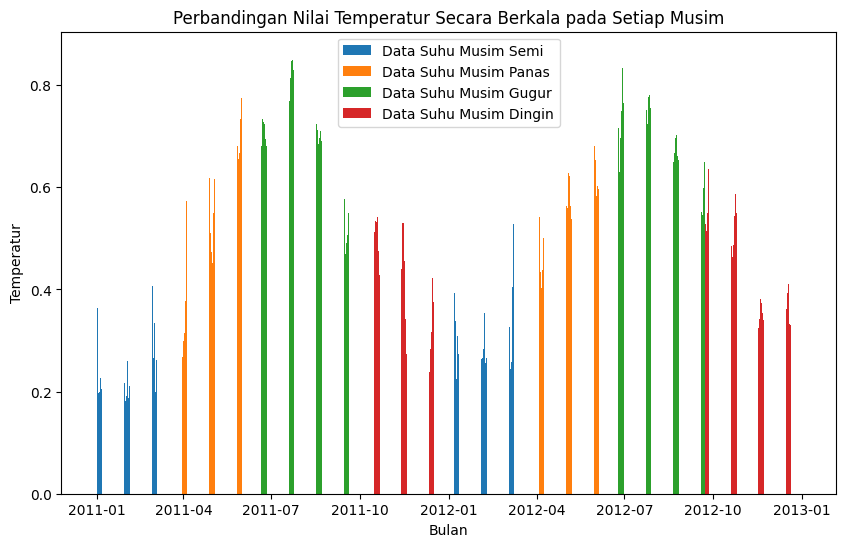

In [66]:
# Plot bar chart
plt.figure(figsize=(10, 6))

# Plot bar chart untuk data musim semi
plt.bar(bs_spring_df['dteday'], bs_spring_df['temp'], width=0.2, label='Data Suhu Musim Semi')

# Plot bar chart untuk data musim panas
plt.bar(bs_summer_df['dteday'], bs_summer_df['temp'], width=0.2, label='Data Suhu Musim Panas', align='edge')

# Plot bar chart untuk data musim gugur
plt.bar(bs_fall_df['dteday'], bs_fall_df['temp'], width=0.2, label='Data Suhu Musim Gugur', align='center')

# Plot bar chart untuk data musim dingin
plt.bar(bs_winter_df['dteday'], bs_winter_df['temp'], width=0.2, label='Data Suhu Musim Dingin', align='edge')

plt.xlabel('Bulan')
plt.ylabel('Temperatur')
plt.title('Perbandingan Nilai Temperatur Secara Berkala pada Setiap Musim')
plt.legend()

plt.show()

Terjadi kenaikan suhu pada penghujung musim panas hingga pertengahan musim gugur, lalu suhu turun kembali menjelang penghujung musim gugur yang mendekati awal dari musim dingin. Bentuk grafik ini memiliki cukup persamaan dengan bentuk grafik jumlah peminjam sepeda.

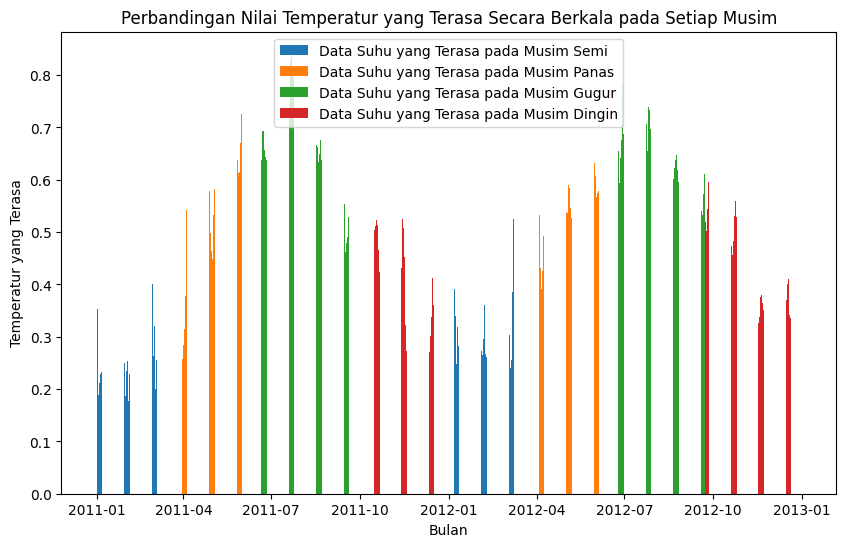

In [67]:
# Plot bar chart
plt.figure(figsize=(10, 6))

# Plot bar chart untuk data musim semi
plt.bar(bs_spring_df['dteday'], bs_spring_df['atemp'], width=0.2, label='Data Suhu yang Terasa pada Musim Semi')

# Plot bar chart untuk data musim panas
plt.bar(bs_summer_df['dteday'], bs_summer_df['atemp'], width=0.2, label='Data Suhu yang Terasa pada Musim Panas', align='edge')

# Plot bar chart untuk data musim gugur
plt.bar(bs_fall_df['dteday'], bs_fall_df['atemp'], width=0.2, label='Data Suhu yang Terasa pada Musim Gugur', align='center')

# Plot bar chart untuk data musim dingin
plt.bar(bs_winter_df['dteday'], bs_winter_df['atemp'], width=0.2, label='Data Suhu yang Terasa pada Musim Dingin', align='edge')

plt.xlabel('Bulan')
plt.ylabel('Temperatur yang Terasa')
plt.title('Perbandingan Nilai Temperatur yang Terasa Secara Berkala pada Setiap Musim')
plt.legend()

plt.show()

Sama dengan nilai suhu, terjadi kenaikan suhu yang terasa pada penghujung musim panas hingga pertengahan musim gugur, lalu suhu turun kembali menjelang penghujung musim gugur yang mendekati awal dari musim dingin. Bentuk grafik ini memiliki cukup persamaan dengan bentuk grafik jumlah peminjam sepeda.

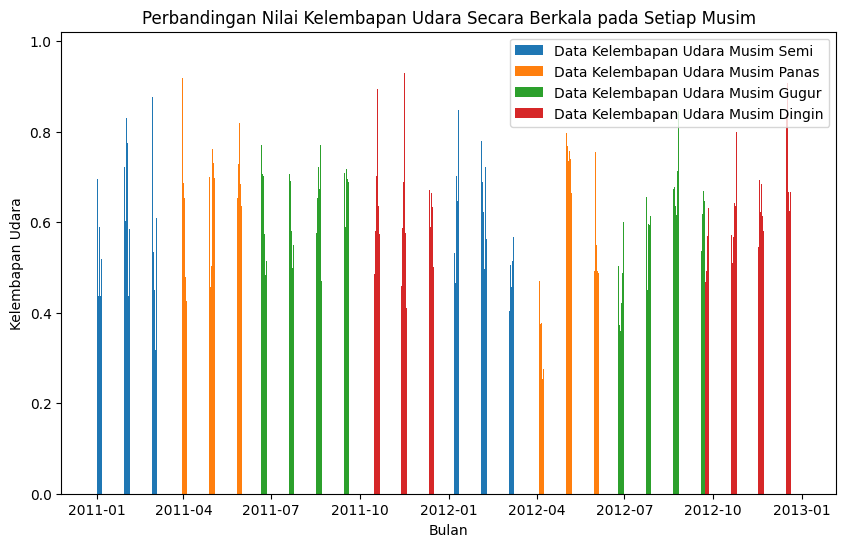

In [68]:
# Plot bar chart
plt.figure(figsize=(10, 6))

# Plot bar chart untuk data musim semi
plt.bar(bs_spring_df['dteday'], bs_spring_df['hum'], width=0.2, label='Data Kelembapan Udara Musim Semi')

# Plot bar chart untuk data musim panas
plt.bar(bs_summer_df['dteday'], bs_summer_df['hum'], width=0.2, label='Data Kelembapan Udara Musim Panas', align='edge')

# Plot bar chart untuk data musim gugur
plt.bar(bs_fall_df['dteday'], bs_fall_df['hum'], width=0.2, label='Data Kelembapan Udara Musim Gugur', align='center')

# Plot bar chart untuk data musim dingin
plt.bar(bs_winter_df['dteday'], bs_winter_df['hum'], width=0.2, label='Data Kelembapan Udara Musim Dingin', align='edge')

plt.xlabel('Bulan')
plt.ylabel('Kelembapan Udara')
plt.title('Perbandingan Nilai Kelembapan Udara Secara Berkala pada Setiap Musim')
plt.legend()

plt.show()

Terjadi perubahan tingkat kelembapan udara di setiap musimnya, terutama pada pergantian musim semi menuju musim panas dan pada saat mendekati musim dingin.

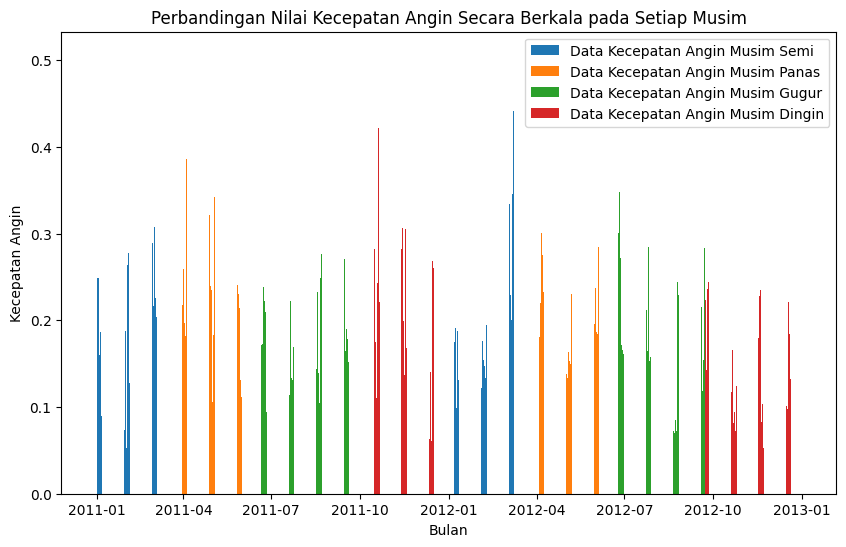

In [69]:
# Plot bar chart
plt.figure(figsize=(10, 6))

# Plot bar chart untuk data musim semi
plt.bar(bs_spring_df['dteday'], bs_spring_df['windspeed'], width=0.2, label='Data Kecepatan Angin Musim Semi')

# Plot bar chart untuk data musim panas
plt.bar(bs_summer_df['dteday'], bs_summer_df['windspeed'], width=0.2, label='Data Kecepatan Angin Musim Panas', align='edge')

# Plot bar chart untuk data musim gugur
plt.bar(bs_fall_df['dteday'], bs_fall_df['windspeed'], width=0.2, label='Data Kecepatan Angin Musim Gugur', align='center')

# Plot bar chart untuk data musim dingin
plt.bar(bs_winter_df['dteday'], bs_winter_df['windspeed'], width=0.2, label='Data Kecepatan Angin Musim Dingin', align='edge')

plt.xlabel('Bulan')
plt.ylabel('Kecepatan Angin')
plt.title('Perbandingan Nilai Kecepatan Angin Secara Berkala pada Setiap Musim')
plt.legend()

plt.show()

Terjadi perubahan kecepatan angin di setiap musim, terutama pada pergantian menuju musim panas dan musim dingin.

Cara lain untuk mengetahui faktor yang paling mempengaruhi jumlah peminjam sepeda dapat menggunakan plot **nilai korelasi antar kolom**, yaitu sebagai berikut:

<ipython-input-70-a098c4542b93>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bikeshare_corr = bikeshare_df.corr()


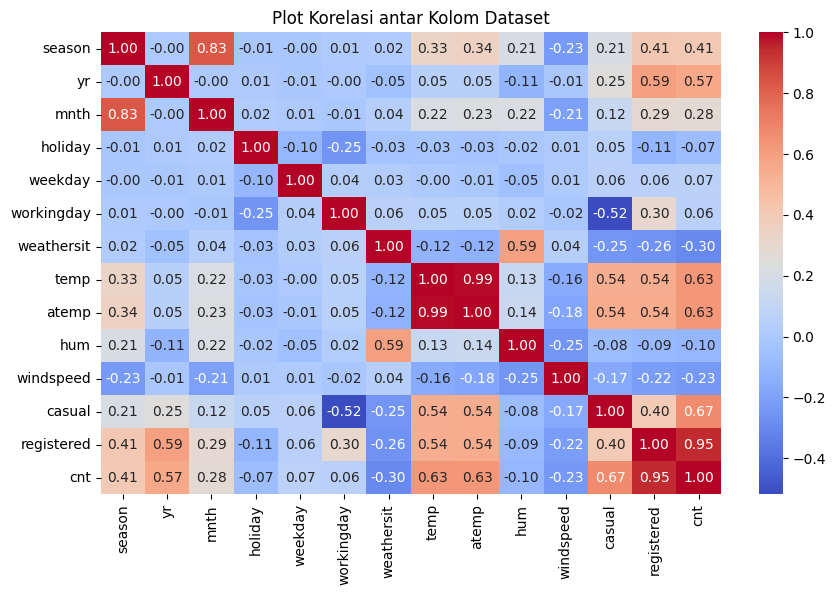

In [70]:
# Menghitung korelasi antar kolom
bikeshare_corr = bikeshare_df.corr()

# Plot korelasi menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(bikeshare_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Plot Korelasi antar Kolom Dataset')
plt.show()

Diketahui bahwa nilai dari kolom lain yang paling berpengaruh terhadap jumlah peminjam sepeda secara berkala adalah 'temp' dan 'atemp', yaitu berkaitan dengan temperatur udara pada suatu waktu.

## Conclusion

- Conclusion pertanyaan 1:
  1.   Jumlah peminjam terbanyak pada hari libur terdapat pada tanggal **4 Juli 2012**, bertepatan pada **Hari Rabu**. Hari tersebut merupakan **peringatan kemerdekaan Amerika Serikat**.
  2.   Jumlah peminjam terbanyak pada hari libur terdapat pada tanggal **23 Maret 2012**, bertepatan pada **Hari Jumat**.

- Conclusion pertanyaan 2:
  Grafik jumlah peminjam sepeda selama dua tahun tersebut selalu mengalami lonjakanan selama dua tahun berturut-turut pada pertengahan tahun, lalu turun kembali menuju penghujung suatu tahun. **Lonjakan tersebut terjadi di sekitar Bulan Maret-Mei** dan turn kembali di sekitar Bulan September-Oktober

- Conclusion pertanyaan 3:
  Kondisi **temperatur udara** merupakan faktor yang paling mempengaruhi jumlah peminjam sepeda di setiap musimnya.

##Lain-Lain

### Melakukan persiapan untuk melakukan dashboarding menggunakan Streamlit: mengunduh file data dalam format csv

In [71]:
# Menyimpan dataset baru pada csv file

bikeshare_df.to_csv("bikeshare.csv", index=False)
bs_hol_df.to_csv("holiday_bs.csv", index=False)
bs_work_df.to_csv("workday_bs.csv", index=False)
monthly_bs_df.to_csv("monthly_bs.csv", index=False)
bs_season_df.to_csv("season_bs.csv", index=False)
bs_spring_df.to_csv("spring_bs.csv", index=False)
bs_summer_df.to_csv("summer_bs.csv", index=False)
bs_fall_df.to_csv("fall_bs.csv", index=False)
bs_winter_df.to_csv("winter_bs.csv", index=False)

###Membuat dokumen requirements.txt

In [72]:
# Install library session_info

!pip install session-info

In [73]:
# Import library session_info
import session_info

# Generate requirements.txt yang berisi informasi session yang didapatkan
session_info.show(write_req_file=True, req_file_name='requirements.txt')